In [1]:
from __future__ import division

from cmath import *
from math import radians
from numpy import arange
from numpy import testing

import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Constants

In [2]:
# refractive indices
n0 = 1
n_Ni = 1.76 + 1j * 3.1
n_Co = 2.2129 + 1j * 4.1710

# wavelength (in nm)
l = 633

# incidence angle
theta = 45

### Auxiliary functions

In [3]:
# refraction angle
def theta_func(na, nb, thetaa):
    return asin( na * sin(thetaa) / nb )

# p-reflectivity
def rp(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rpab = (nb*cos(thetaa) - na*cos(thetab)) / (nb*cos(thetaa) + na*cos(thetab))
    return rpab

# s-reflectivity
def rs(na, nb, thetaa):
    thetab = theta_func(na, nb, thetaa)
    rsab = (na*cos(thetaa) - nb*cos(thetab)) / (na*cos(thetaa) + nb*cos(thetab))
    return rsab

### Calculation

In [4]:
theta_in = radians(theta)
theta_in

0.7853981633974483

In [5]:
rs_Ni = rs(n0, n_Ni, theta_in)
rp_Ni = rp(n0, n_Ni, theta_in)
rs_Co = rs(n0, n_Co, theta_in)
rp_Co = rp(n0, n_Co, theta_in)

In [6]:
print 'Incidence angle', theta, 'degrees\n'
print 's-reflectivity of Ni: \t', '{0:.4f}'.format(rs_Ni)
print 'p-reflectivity of Ni: \t', '{0:.4f}'.format(rp_Ni), '\n'
print 's-reflectivity of Co: \t', '{0:.4f}'.format(rs_Co)
print 'p-reflectivity of Co: \t', '{0:.4f}'.format(rp_Co)

Incidence angle 45 degrees

s-reflectivity of Ni: 	-0.7837-0.2809j
p-reflectivity of Ni: 	0.5353+0.4404j 

s-reflectivity of Co: 	-0.8435-0.2279j
p-reflectivity of Co: 	0.6596+0.3845j


In [7]:
(rp_Ni + rs_Ni) / (rp_Ni - rs_Ni)

(-0.09409542492685168+0.17231869889532211j)

In [8]:
(rp_Co + rs_Co) / (rp_Co - rs_Co)

(-0.06853554885819979+0.13209096460088177j)

## Plots

In [9]:
d_theta = 1

theta_min = 0
theta_max = 90 + d_theta


theta_list = arange(theta_min, theta_max, d_theta)

In [10]:
rp_Ni = []
rs_Ni = []
rp_Co = []
rs_Co = []

for t in theta_list:
    rp_Ni.append( rp(n0, n_Ni, radians(t)) )
    rs_Ni.append( rs(n0, n_Ni, radians(t)) ) 
    
    rp_Co.append( rp(n0, n_Co, radians(t)) )
    rs_Co.append( rs(n0, n_Co, radians(t)) )

    

In [11]:
df = pd.DataFrame({'theta' : theta_list,
                   'rp_Ni' : rp_Ni,
                   'rs_Ni' : rs_Ni,
                   'rp_Co' : rp_Co,
                   'rs_Co' : rs_Co})

for col in df:
    df[col + '^2'] = (df[col])**2
df.drop('theta^2', axis = 1, inplace = True)

df['rp_Ni^2 - rs_Ni^2'] = df['rp_Ni^2'] - df['rs_Ni^2']
df['rp_Ni^2 + rs_Ni^2'] = df['rp_Ni^2'] + df['rs_Ni^2'] 

df['rp_Co^2 - rs_Co^2'] = df['rp_Co^2'] - df['rs_Co^2']
df['rp_Co^2 + rs_Co^2'] = df['rp_Co^2'] + df['rs_Co^2']

df.to_csv('Ni_Co_reflectivities.csv', index = False)

df.head()

,rp_Co,rp_Ni,rs_Co,rs_Ni,theta,rp_Co^2,rp_Ni^2,rs_Co^2,rs_Ni^2,rp_Ni^2 - rs_Ni^2,rp_Ni^2 + rs_Ni^2,rp_Co^2 - rs_Co^2,rp_Co^2 + rs_Co^2
0,(0.768188760652+0.300938304747j),(0.679583923472+0.359887622188j),(-0.768188760652-0.300938304747j),(-0.679583923472-0.359887622188j),0,(0.499550108728+0.462354846712j),(0.332315208437+0.48914768459j),(0.499550108728+0.462354846712j),(0.332315208437+0.48914768459j),0j,(0.664630416874+0.978295369181j),0j,(0.999100217456+0.924709693424j)
1,(0.768148377998+0.30097298801j),(0.679528502482+0.359922941472j),(-0.768229136751-0.300903623512j),(-0.679639336438-0.359852303028j),1,(0.49946719111+0.462383825122j),(0.332214461888+0.489155794854j),(0.49963301591+0.462325861872j),(0.332415947639+0.489139560892j),(-0.00020148575128+1.62339625101e-05j),(0.664630409527+0.978295355746j),(-0.000165824800414+5.79632500039e-05j),(0.99910020702+0.924709686993j)
2,(0.768027170283+0.301077072252j),(0.679362166021+0.360028925831j),(-0.768350246109-0.300799569705j),(-0.679805552511-0.359746320549j),2,(0.499218330858+0.462470743678j),(0.331912125186+0.489180061765j),(0.49988171956+0.462238846825j),(0.332718174077+0.48911509241j),(-0.000806048890785+6.49693552589e-05j),(0.664630299263+0.978295154174j),(-0.000663388702619+0.000231896853464j),(0.999100050418+0.924709590503j)
3,(0.767824958035+0.301250660902j),(0.679084693372+0.360205654798j),(-0.768552031913-0.300626113047j),(-0.680082503202-0.359569599795j),3,(0.498803205487+0.462615552131j),(0.331407907024+0.489220293279j),(0.500296165911+0.462093620057j),(0.333221914064+0.489073987008j),(-0.00181400704052+0.000146306271331j),(0.664629821088+0.978294280286j),(-0.00149296042439+0.000521932074067j),(0.999099371398+0.924709172188j)
4,(0.767541441411+0.301493926561j),(0.678695715866+0.360453260975j),(-0.76883439948-0.300383203169j),(-0.680470074308-0.359322016008j),4,(0.498221276531+0.462818165938j),(0.330701321387+0.489276167987j),(0.500876265077+0.461889879245j),(0.333927210841+0.489015757867j),(-0.00322588945358+0.00026041012044j),(0.664628532228+0.978291925854j),(-0.00265498854628+0.00092828669324j),(0.999097541608+0.924708045184j)


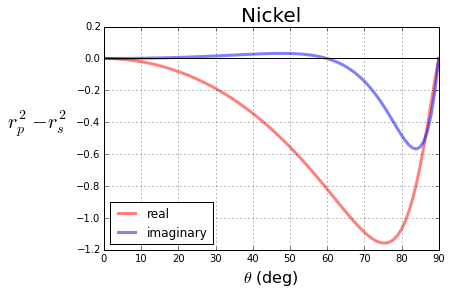

In [12]:
plt.plot( df['theta'], df['rp_Ni^2 - rs_Ni^2'].apply(lambda x : x.real),
            lw = 3, color = 'r', alpha = 0.5, label = 'real')
plt.plot( df['theta'], df['rp_Ni^2 - rs_Ni^2'].apply(lambda x : x.imag),
            lw = 3, color = 'b', alpha = 0.5, label = 'imaginary')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)', fontsize = 16)
plt.ylabel(r'$r_p^2 - r_s^2$', fontsize = 20, rotation = 'horizontal', labelpad = 40)

plt.legend(loc = 3)

plt.title('Nickel', fontsize = 20)

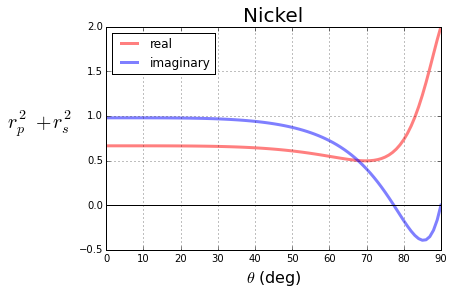

In [13]:
plt.plot( df['theta'], df['rp_Ni^2 + rs_Ni^2'].apply(lambda x : x.real),
            lw = 3, color = 'r', alpha = 0.5, label = 'real')
plt.plot( df['theta'], df['rp_Ni^2 + rs_Ni^2'].apply(lambda x : x.imag),
            lw = 3, color = 'b', alpha = 0.5, label = 'imaginary')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)', fontsize = 16)
plt.ylabel(r'$r_p^2 + r_s^2$', fontsize = 20, rotation = 'horizontal', labelpad = 40)

plt.legend(loc = 2)

plt.title('Nickel', fontsize = 20)

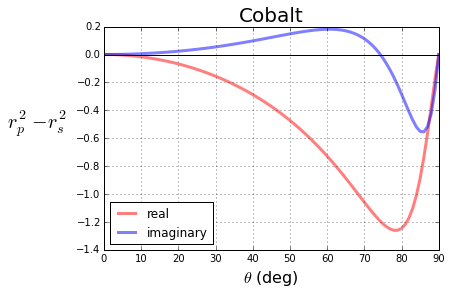

In [14]:
plt.plot( df['theta'], df['rp_Co^2 - rs_Co^2'].apply(lambda x : x.real),
            lw = 3, color = 'r', alpha = 0.5, label = 'real')
plt.plot( df['theta'], df['rp_Co^2 - rs_Co^2'].apply(lambda x : x.imag),
            lw = 3, color = 'b', alpha = 0.5, label = 'imaginary')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)', fontsize = 16)
plt.ylabel(r'$r_p^2 - r_s^2$', fontsize = 20, rotation = 'horizontal', labelpad = 40)

plt.legend(loc = 3)

plt.title('Cobalt', fontsize = 20)

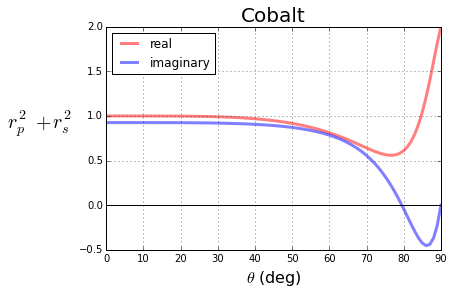

In [15]:
plt.plot( df['theta'], df['rp_Co^2 + rs_Co^2'].apply(lambda x : x.real),
            lw = 3, color = 'r', alpha = 0.5, label = 'real')
plt.plot( df['theta'], df['rp_Co^2 + rs_Co^2'].apply(lambda x : x.imag),
            lw = 3, color = 'b', alpha = 0.5, label = 'imaginary')

plt.axhline(y=0, color='k')
plt.grid()
plt.xlabel(r'$\theta$ (deg)', fontsize = 16)
plt.ylabel(r'$r_p^2 + r_s^2$', fontsize = 20, rotation = 'horizontal', labelpad = 40)

plt.legend(loc = 2)

plt.title('Cobalt', fontsize = 20)

In [30]:
df_parsed = pd.DataFrame({'theta' : df['theta']})

for col in df:
    if df[col].dtype == 'complex128':
        df_parsed[col + '_re'] = df[col].real
        df_parsed[col + '_im'] = df[col].imag

df_parsed.head()

,theta,rp_Co_re,rp_Co_im,rp_Ni_re,rp_Ni_im,rs_Co_re,rs_Co_im,rs_Ni_re,rs_Ni_im,rp_Co^2_re,...,rs_Ni^2_re,rs_Ni^2_im,rp_Ni^2 - rs_Ni^2_re,rp_Ni^2 - rs_Ni^2_im,rp_Ni^2 + rs_Ni^2_re,rp_Ni^2 + rs_Ni^2_im,rp_Co^2 - rs_Co^2_re,rp_Co^2 - rs_Co^2_im,rp_Co^2 + rs_Co^2_re,rp_Co^2 + rs_Co^2_im
0,0,0.768189,0.300938,0.679584,0.359888,-0.768189,-0.300938,-0.679584,-0.359888,0.499550,...,0.332315,0.489148,0.000000,0.000000,0.664630,0.978295,0.000000,0.000000,0.999100,0.924710
1,1,0.768148,0.300973,0.679529,0.359923,-0.768229,-0.300904,-0.679639,-0.359852,0.499467,...,0.332416,0.489140,-0.000201,0.000016,0.664630,0.978295,-0.000166,0.000058,0.999100,0.924710
2,2,0.768027,0.301077,0.679362,0.360029,-0.768350,-0.300800,-0.679806,-0.359746,0.499218,...,0.332718,0.489115,-0.000806,0.000065,0.664630,0.978295,-0.000663,0.000232,0.999100,0.924710
3,3,0.767825,0.301251,0.679085,0.360206,-0.768552,-0.300626,-0.680083,-0.359570,0.498803,...,0.333222,0.489074,-0.001814,0.000146,0.664630,0.978294,-0.001493,0.000522,0.999099,0.924709
4,4,0.767541,0.301494,0.678696,0.360453,-0.768834,-0.300383,-0.680470,-0.359322,0.498221,...,0.333927,0.489016,-0.003226,0.000260,0.664629,0.978292,-0.002655,0.000928,0.999098,0.924708


In [31]:
df_parsed.to_csv('Ni_Co_reflectivities_parsed.csv', index = False)